# Gradient Descent

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [4]:
a = np.array([1, 3, 2, 4])

In [5]:
a

array([1, 3, 2, 4])

In [6]:
type(a)

numpy.ndarray

In [7]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [8]:
A[0]

array([3, 1, 2])

In [9]:
C[2, 0]

4

In [10]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [11]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [12]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [13]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [14]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [15]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Uncomment the code in the next cells. You will see that tensors of different shape cannot be added or multiplied:

In [16]:
# A + B

In [17]:
# A * B

### Dot product

In [18]:
A.shape

(2, 3)

In [19]:
B.shape

(3, 2)

In [20]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [21]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [22]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [23]:
C.shape

(6, 2)

In [24]:
A.shape

(2, 3)

In [25]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

Uncomment the code in the next cell to visualize the error:

In [26]:
# A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [27]:
df = pd.read_csv('../data/banknotes.csv')

In [28]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [29]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [30]:
import seaborn as sns

/anaconda3/envs/zero/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/zero/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


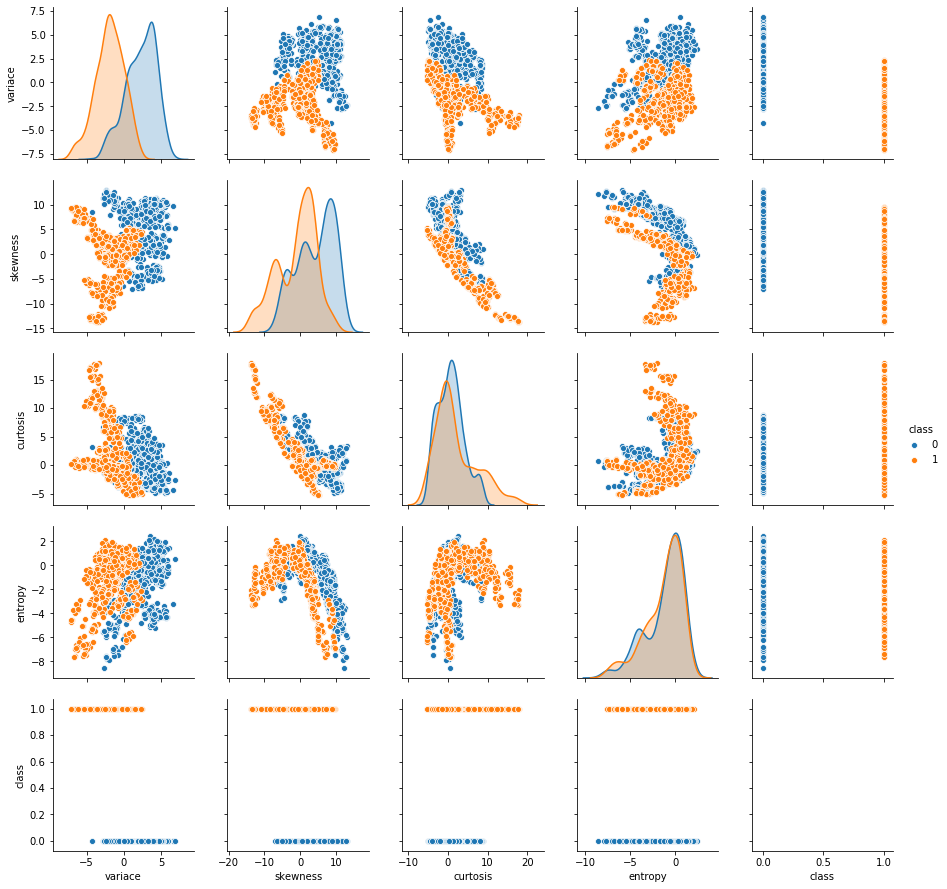

In [31]:
sns.pairplot(df, hue="class")

#### Baseline model

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [33]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [34]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

/anaconda3/envs/zero/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/zero/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/zero/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/zero/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.98908297, 0.9868709 , 1.        ])

### Logistic Regression Model

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [36]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [37]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
960/960 [==============================] - 1s 605us/step - loss: 0.5412 - acc: 0.7427
Epoch 2/10
960/960 [==============================] - 0s 55us/step - loss: 0.5289 - acc: 0.7458
Epoch 3/10
960/960 [==============================] - 0s 62us/step - loss: 0.5173 - acc: 0.7479
Epoch 4/10
960/960 [==============================] - 0s 67us/step - loss: 0.5063 - acc: 0.7531
Epoch 5/10
960/960 [==============================] - 0s 64us/step - loss: 0.4957 - acc: 0.7594
Epoch 6/10
960/960 [==============================] - 0s 61us/step - loss: 0.4856 - acc: 0.7625
Epoch 7/10
960/960 [==============================] - 0s 71us/step - loss: 0.4760 - acc: 0.7677
Epoch 8/10
960/960 [==============================] - 0s 80us/step - loss: 0.4666 - acc: 0.7729
Epoch 9/10
960/960 [==============================] - 0s 69us/step - loss: 0.4577 - acc: 0.7750
Epoch 10/10
412

In [38]:
historydf = pd.DataFrame(history.history, index=history.epoch)

Text(0.5, 1.0, 'Test accuracy: 76.2 %')

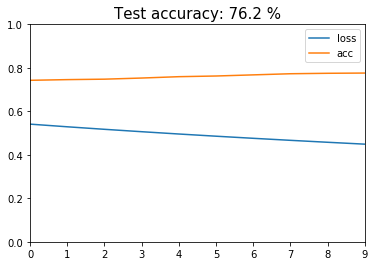

In [39]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [40]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [41]:
historydf = pd.concat(dflist, axis=1)

In [42]:
historydf

,loss,acc,loss,acc,loss,acc,loss,acc
0,0.586982,0.651042,0.586687,0.717708,0.462921,0.81875,0.259697,0.922917


In [43]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [44]:
historydf

learning_rate      0.01                0.05                0.10           \
metric             loss       acc      loss       acc      loss      acc   
0              0.586982  0.651042  0.586687  0.717708  0.462921  0.81875   

learning_rate      0.50            
metric             loss       acc  
0              0.259697  0.922917

/anaconda3/envs/zero/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/anaconda3/envs/zero/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/anaconda3/envs/zero/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/anaconda3/envs/zero/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/anaconda3/envs/zero/lib/python3.7/site-packages/pandas/plotting/_core.py:10

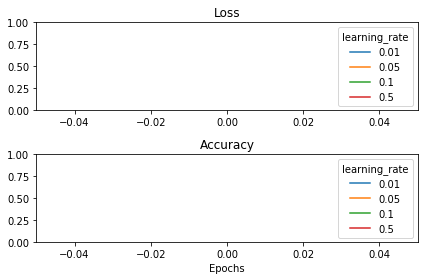

In [45]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [46]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [47]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [48]:
historydf

batch_size       16                  32                  64             \
metric          loss       acc      loss       acc      loss       acc   
0           0.820132  0.360417  0.873301  0.532292  1.072896  0.340625   

batch_size       128            
metric          loss       acc  
0           0.636046  0.617708

/anaconda3/envs/zero/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/anaconda3/envs/zero/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/anaconda3/envs/zero/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/anaconda3/envs/zero/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/anaconda3/envs/zero/lib/python3.7/site-packages/pandas/plotting/_core.py:10

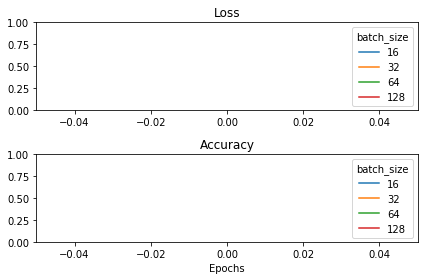

In [49]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [50]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [51]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [52]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

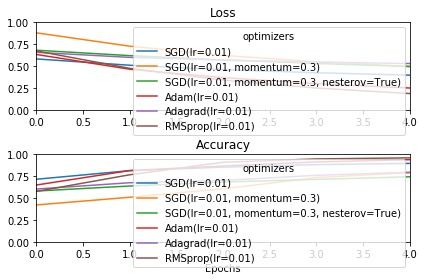

In [53]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [54]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [55]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

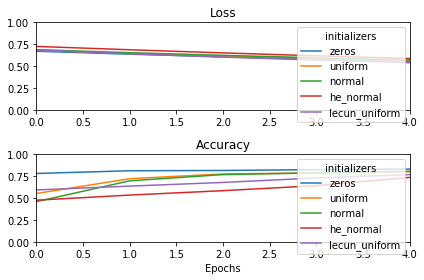

In [56]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [57]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 1s 1ms/step - loss: 0.6549 - acc: 0.6652 - val_loss: 0.5614 - val_acc: 0.8264
Epoch 2/20
672/672 [==============================] - 0s 124us/step - loss: 0.4757 - acc: 0.8512 - val_loss: 0.3801 - val_acc: 0.8681
Epoch 3/20
672/672 [==============================] - 0s 119us/step - loss: 0.3038 - acc: 0.9003 - val_loss: 0.2293 - val_acc: 0.9236
Epoch 4/20
672/672 [==============================] - 0s 128us/step - loss: 0.1870 - acc: 0.9301 - val_loss: 0.1398 - val_acc: 0.9479
Epoch 5/20
672/672 [==============================] - 0s 138us/step - loss: 0.1158 - acc: 0.9568 - val_loss: 0.0861 - val_acc: 0.9722
Epoch 6/20
672/672 [==============================] - 0s 147us/step - loss: 0.0751 - acc: 0.9702 - val_loss: 0.0550 - val_acc: 0.9826
Epoch 7/20
672/672 [==============================] - 0s 146us/step - loss: 0.0576 - acc: 0.9777 - val_loss: 0.0453 - val_acc: 0.9826
Epoch 8/20
672/672

In [58]:
result

[0.02777065981396483, 0.9878640776699029]

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.layers

In [61]:
inp = model.layers[0].input
out = model.layers[0].output

In [62]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [63]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [64]:
features_function = K.function([inp], [out])

In [65]:
features_function

In [66]:
features_function([X_test])[0].shape

(412, 2)

In [67]:
features = features_function([X_test])[0]

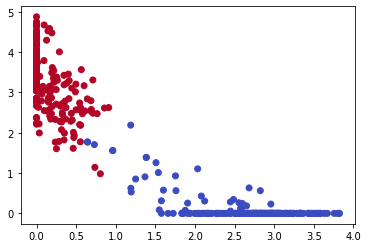

In [68]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [69]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

412/412 [==============================] - 0s 16us/step


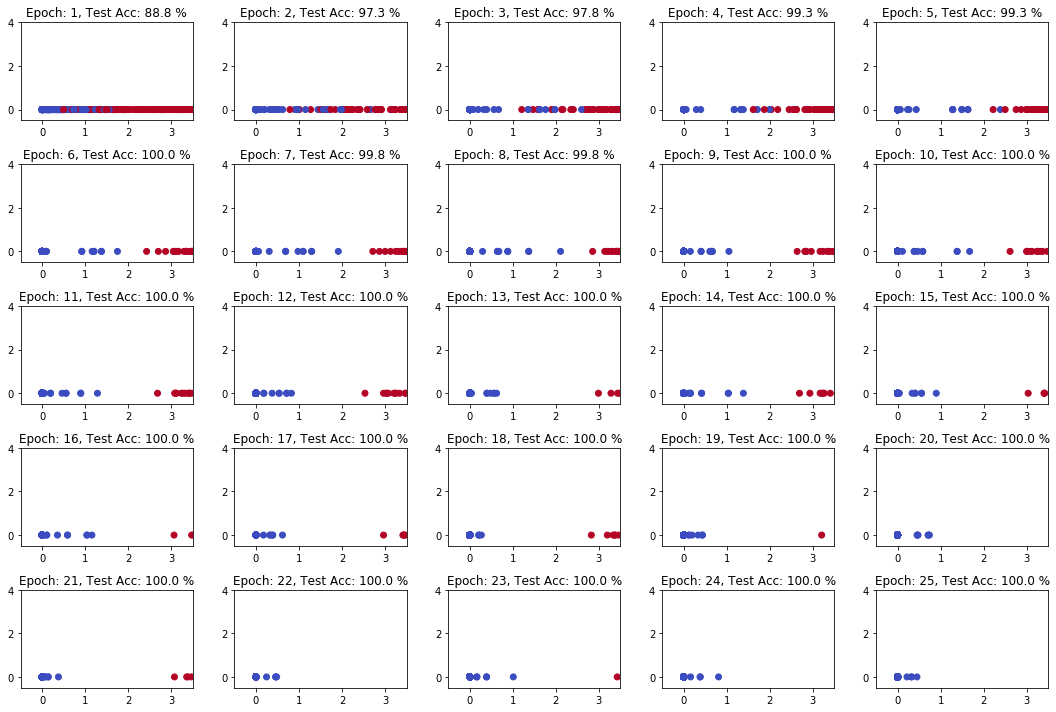

In [70]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [71]:
df1 = pd.read_csv('../data/wines.csv')
df1.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [72]:
df1['Class'].unique()

array([1, 2, 3])

In [73]:
df1.describe().round(2)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [85]:
# X = df1.drop('Class', axis=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_fit = sc.fit(df1.drop('Class', axis=1))
X = X_fit.transform(df1.drop('Class', axis=1))

# X = scale(df1.drop('Class', axis=1).values)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [75]:
y = pd.get_dummies(df1['Class'], prefix='Class').values

/anaconda3/envs/zero/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/zero/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


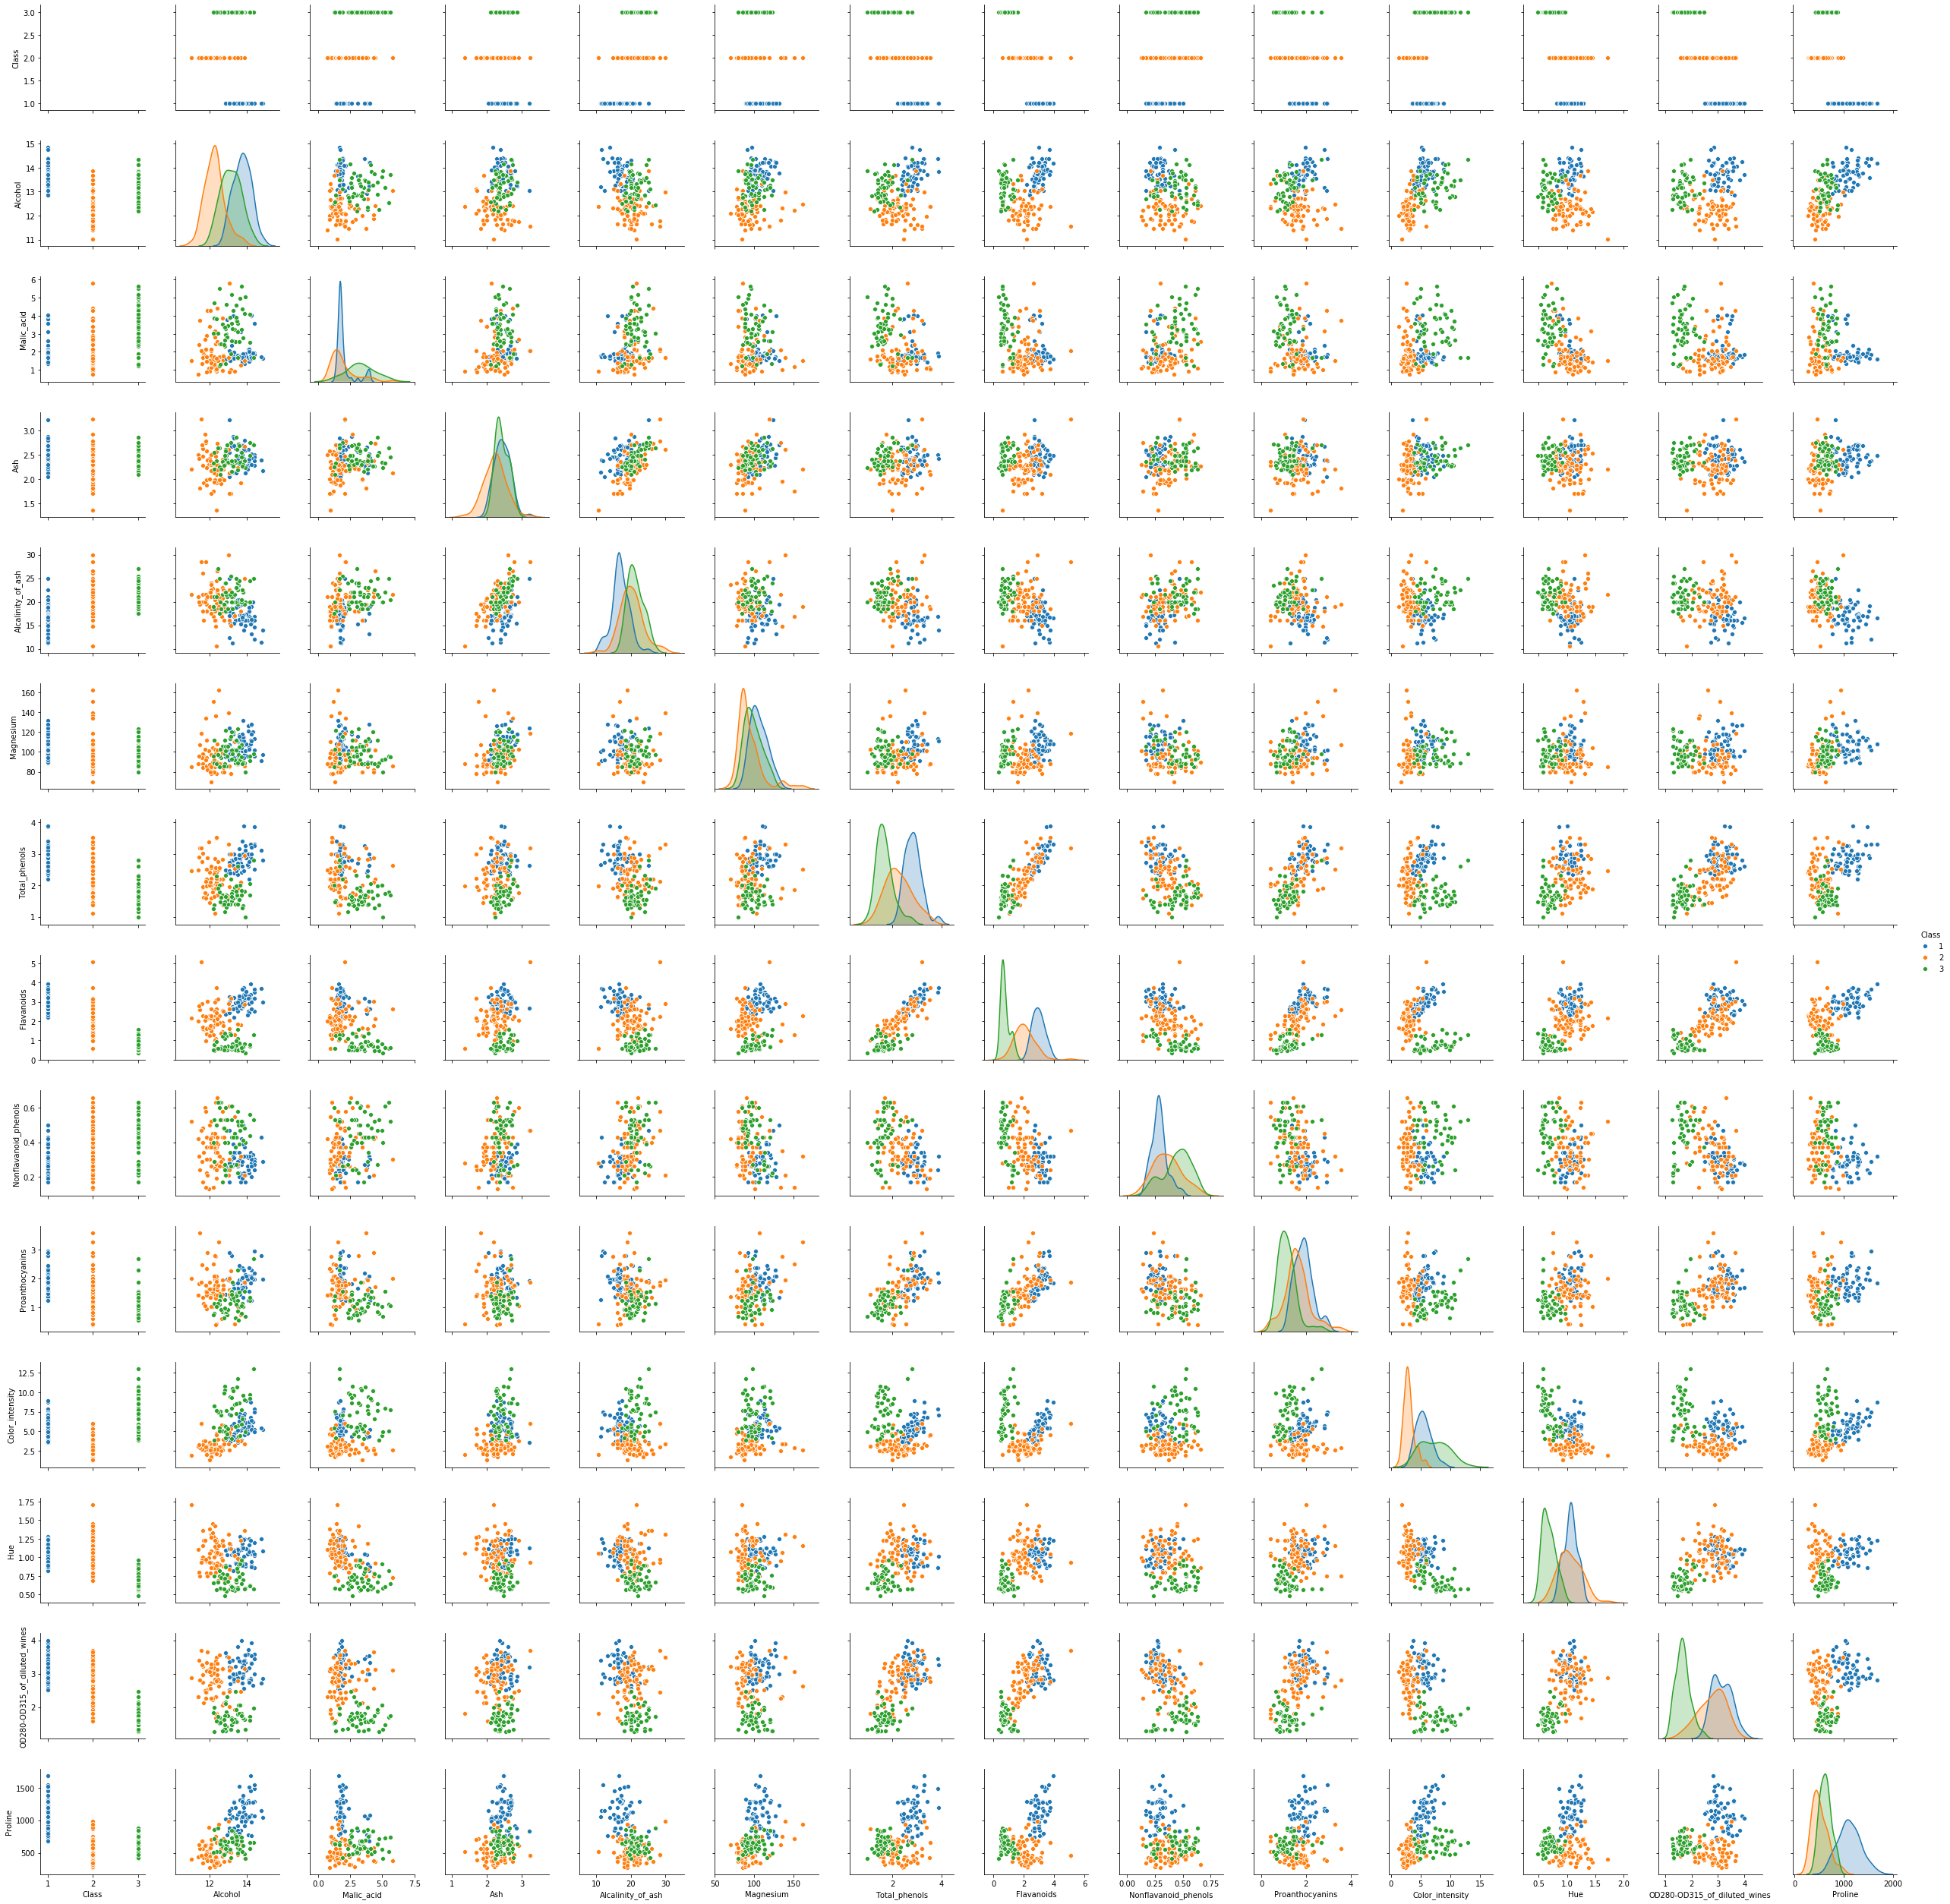

In [76]:
sns.pairplot(df1, hue="Class")

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
y.shape[1]

3

In [79]:
model1 = Sequential()
model1.add(Dense(8, input_shape=(X.shape[1],), activation='relu'))
model1.add(Dense(8, activation='tanh'))
model1.add(Dense(y.shape[1], activation='softmax'))
model1.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])

In [80]:
model1.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 113 samples, validate on 29 samples
Epoch 1/50
113/113 [==============================] - 1s 8ms/step - loss: 0.5085 - acc: 0.7522 - val_loss: 0.0654 - val_acc: 0.9655
Epoch 2/50
113/113 [==============================] - 0s 93us/step - loss: 0.0898 - acc: 0.9823 - val_loss: 0.0190 - val_acc: 1.0000
Epoch 3/50
113/113 [==============================] - 0s 87us/step - loss: 0.0193 - acc: 1.0000 - val_loss: 0.0200 - val_acc: 1.0000
Epoch 4/50
113/113 [==============================] - 0s 83us/step - loss: 0.0206 - acc: 0.9823 - val_loss: 8.2898e-04 - val_acc: 1.0000
Epoch 5/50
113/113 [==============================] - 0s 86us/step - loss: 0.0082 - acc: 0.9912 - val_loss: 0.0347 - val_acc: 0.9655
Epoch 6/50
113/113 [==============================] - 0s 83us/step - loss: 0.0467 - acc: 0.9823 - val_loss: 0.0249 - val_acc: 1.0000
Epoch 7/50
113/113 [==============================] - 0s 74us/step - loss: 0.0130 - acc: 0.9912 - val_loss: 0.0618 - val_acc: 0.9655
Epoch 8/50
113/113 [=

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model1.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model1.predict(X_test) > 0.5)))

The train accuracy score is 1.000
The test accuracy score is 1.000


### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [121]:
K.clear_session()
model2 = Sequential()
model2.add(Dense(8, input_shape=(X.shape[1],), activation='relu'))
model2.add(Dense(8, activation='tanh'))
model2.add(Dense(2, activation='tanh'))
model2.add(Dense(y.shape[1], activation='softmax'))
model2.compile(Adam(lr=0.01), 'categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=200, validation_split=0.2)

Train on 113 samples, validate on 29 samples
Epoch 1/200
113/113 [==============================] - 1s 12ms/step - loss: 1.0401 - acc: 0.4690 - val_loss: 0.8865 - val_acc: 0.7931
Epoch 2/200
113/113 [==============================] - 0s 118us/step - loss: 0.8733 - acc: 0.7965 - val_loss: 0.7585 - val_acc: 0.9655
Epoch 3/200
113/113 [==============================] - 0s 106us/step - loss: 0.7501 - acc: 0.8673 - val_loss: 0.6703 - val_acc: 0.9655
Epoch 4/200
113/113 [==============================] - 0s 125us/step - loss: 0.6587 - acc: 0.9292 - val_loss: 0.6044 - val_acc: 0.9655
Epoch 5/200
113/113 [==============================] - 0s 123us/step - loss: 0.5889 - acc: 0.9469 - val_loss: 0.5544 - val_acc: 0.9310
Epoch 6/200
113/113 [==============================] - 0s 142us/step - loss: 0.5322 - acc: 0.9558 - val_loss: 0.5113 - val_acc: 0.9655
Epoch 7/200
113/113 [==============================] - 0s 152us/step - loss: 0.4837 - acc: 0.9558 - val_loss: 0.4706 - val_acc: 0.9655
Epoch 8/200

Epoch 61/200
113/113 [==============================] - 0s 161us/step - loss: 0.0688 - acc: 0.9912 - val_loss: 0.1639 - val_acc: 0.9655
Epoch 62/200
113/113 [==============================] - 0s 162us/step - loss: 0.0678 - acc: 0.9912 - val_loss: 0.1606 - val_acc: 0.9655
Epoch 63/200
113/113 [==============================] - 0s 123us/step - loss: 0.0668 - acc: 0.9912 - val_loss: 0.1573 - val_acc: 0.9655
Epoch 64/200
113/113 [==============================] - 0s 152us/step - loss: 0.0659 - acc: 0.9912 - val_loss: 0.1550 - val_acc: 0.9655
Epoch 65/200
113/113 [==============================] - 0s 136us/step - loss: 0.0648 - acc: 0.9912 - val_loss: 0.1528 - val_acc: 0.9655
Epoch 66/200
113/113 [==============================] - 0s 149us/step - loss: 0.0634 - acc: 0.9912 - val_loss: 0.1513 - val_acc: 0.9655
Epoch 67/200
113/113 [==============================] - 0s 162us/step - loss: 0.0584 - acc: 0.9912 - val_loss: 0.1535 - val_acc: 0.9655
Epoch 68/200
113/113 [==========================

113/113 [==============================] - 0s 140us/step - loss: 0.0149 - acc: 1.0000 - val_loss: 0.1359 - val_acc: 0.9655
Epoch 122/200
113/113 [==============================] - 0s 162us/step - loss: 0.0147 - acc: 1.0000 - val_loss: 0.1355 - val_acc: 0.9655
Epoch 123/200
113/113 [==============================] - 0s 150us/step - loss: 0.0145 - acc: 1.0000 - val_loss: 0.1350 - val_acc: 0.9655
Epoch 124/200
113/113 [==============================] - 0s 142us/step - loss: 0.0143 - acc: 1.0000 - val_loss: 0.1345 - val_acc: 0.9655
Epoch 125/200
113/113 [==============================] - 0s 140us/step - loss: 0.0141 - acc: 1.0000 - val_loss: 0.1340 - val_acc: 0.9655
Epoch 126/200
113/113 [==============================] - 0s 143us/step - loss: 0.0140 - acc: 1.0000 - val_loss: 0.1336 - val_acc: 0.9655
Epoch 127/200
113/113 [==============================] - 0s 141us/step - loss: 0.0138 - acc: 1.0000 - val_loss: 0.1331 - val_acc: 0.9655
Epoch 128/200
113/113 [==============================] 

Epoch 181/200
113/113 [==============================] - 0s 158us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.1079 - val_acc: 0.9655
Epoch 182/200
113/113 [==============================] - 0s 206us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.1075 - val_acc: 0.9655
Epoch 183/200
113/113 [==============================] - 0s 187us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.1070 - val_acc: 0.9655
Epoch 184/200
113/113 [==============================] - 0s 208us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.1066 - val_acc: 0.9655
Epoch 185/200
113/113 [==============================] - 0s 229us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 0.1063 - val_acc: 0.9655
Epoch 186/200
113/113 [==============================] - 0s 270us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 0.1058 - val_acc: 0.9655
Epoch 187/200
113/113 [==============================] - 0s 203us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 0.1054 - val_acc: 0.9655
Epoch 188/200
113/113 [==================

In [122]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model2.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model2.predict(X_test) > 0.5)))

The train accuracy score is 0.993
The test accuracy score is 1.000


In [123]:
inp = model2.layers[0].input
out = model2.layers[2].output
features_function = K.function([inp], [out])
features = features_function([X])[0]
features.shape

(178, 2)

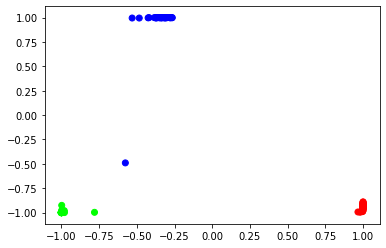

In [124]:
plt.scatter(features[:, 0], features[:, 1], c=y)

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [126]:
from keras.layers import Input
from keras.models import Model

In [131]:
K.clear_session()

inputs = Input(shape=(X.shape[1],))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal', activation='tanh')(x)
outputs = Dense(y.shape[1], activation='softmax')(second_to_last)

model3 = Model(inputs=inputs, outputs=outputs)
model3.compile(RMSprop(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
142/142 [==============================] - 1s 5ms/step - loss: 0.6031 - acc: 0.8099
Epoch 2/20
142/142 [==============================] - 0s 188us/step - loss: 0.2521 - acc: 0.9577
Epoch 3/20
142/142 [==============================] - 0s 157us/step - loss: 0.2147 - acc: 0.9507
Epoch 4/20
142/142 [==============================] - 0s 195us/step - loss: 0.1356 - acc: 0.9718
Epoch 5/20
142/142 [==============================] - 0s 168us/step - loss: 0.0461 - acc: 1.0000
Epoch 6/20
142/142 [==============================] - 0s 178us/step - loss: 0.0270 - acc: 1.0000
Epoch 7/20
142/142 [==============================] - 0s 191us/step - loss: 0.0166 - acc: 1.0000
Epoch 8/20
142/142 [==============================] - 0s 179us/step - loss: 0.0110 - acc: 1.0000
Epoch 9/20
142/142 [==============================] - 0s 197us/step - loss: 0.0074 - acc: 1.0000
Epoch 10/20
142/142 [==============================] - 0s 200us/step - loss: 0.0050 - acc: 1.0000
Epoch 11/20
142/142 [==========

In [132]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model3.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model3.predict(X_test) > 0.5)))

The train accuracy score is 1.000
The test accuracy score is 1.000


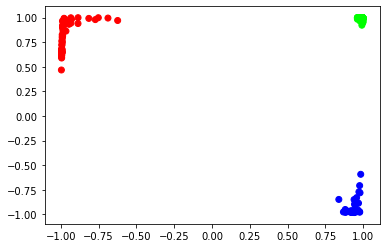

In [133]:
inp = model3.layers[0].input
out = model3.layers[2].output
features_function = K.function([inp], [out])
features = features_function([X])[0]
plt.scatter(features[:, 0], features[:, 1], c=y)

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [134]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [136]:
checkpointer = ModelCheckpoint(
    filepath="/tmp/udemy/weights.hdf5", 
    verbose=1, 
    save_best_only=True)

In [137]:
earlystopper = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=1, verbose=1, mode="auto")

In [138]:
tensorboard = TensorBoard(log_dir="/tmp/udemy/tensorboard/")

In [141]:
K.clear_session()

inputs = Input(shape=(X.shape[1],))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal', activation='tanh')(x)
outputs = Dense(y.shape[1], activation='softmax')(second_to_last)

model3 = Model(inputs=inputs, outputs=outputs)
model3.compile(RMSprop(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, batch_size=16, epochs=20,
           validation_data=(X_test, y_test),
           callbacks=[checkpointer, earlystopper, tensorboard])

Train on 142 samples, validate on 36 samples
Epoch 1/20
142/142 [==============================] - 1s 5ms/step - loss: 0.6533 - acc: 0.7394 - val_loss: 0.2476 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.24764, saving model to /tmp/udemy/weights.hdf5
Epoch 2/20
142/142 [==============================] - 0s 163us/step - loss: 0.2912 - acc: 0.9225 - val_loss: 0.1221 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.24764 to 0.12211, saving model to /tmp/udemy/weights.hdf5
Epoch 3/20
142/142 [==============================] - 0s 190us/step - loss: 0.1178 - acc: 0.9930 - val_loss: 0.0653 - val_acc: 1.0000

Epoch 00003: val_loss improved from 0.12211 to 0.06527, saving model to /tmp/udemy/weights.hdf5
Epoch 4/20
142/142 [==============================] - 0s 197us/step - loss: 0.0951 - acc: 0.9789 - val_loss: 0.0414 - val_acc: 1.0000

Epoch 00004: val_loss improved from 0.06527 to 0.04139, saving model to /tmp/udemy/weights.hdf5
Epoch 5/20
142/142 [=================